In [2]:
"""
Day 1: Vector Implementation from Scratch
Goal": Understand Vectors by Building them ourselves
"""
import math
class Vector:
    def __init__(self, components):
        self.components = components
    def __repr__(self):
        return f"Vector({self.components})"
    def __add__(self, other):
        """ Add two vectors component-wise"""
        if len(self.components) != len(other.components):
            raise ValueError("Vectors must be the same dimension")
        result = [a+b for a,b in zip(self.components, other.components)]
        return Vector(result)
    def __mul__(self, scalar):
        """Multiply vector by a scalar"""
        result = [scalar * component for component in self.components]
        return Vector(result)
    def magnitude(self):
        # use pythagorean theorem
        sum_of_squares = sum(c**2 for c in self.components)
        return sum_of_squares ** .5
    def dot(self, other):
        """Compute dot product with another vector"""
        if len(self.components) != len(other.components):
            raise ValueError("Vectors must be the same dimension")
        return sum(a*b for a,b in zip(self.components, other.components))
    def normalize(self):
        """Return a unit vector (magnitude = 1) in the same direction"""
        return [component / self.magnitude() for component in self.components]
    def angle_between(self, other):
        """Calculate the angle between two vectors, return in degrees"""
        dot = self.dot(other)
        dot = dot / (self.magnitude() * other.magnitude())
        angle = math.degrees(math.acos(dot))
        return angle
    def projection(self, other):
        """Project self onto other"""
        # get unit vector
        other_norm = other.normalize()
        unit = Vector(other_norm)
        # get scalar by computing dot product of v1 (self) by normalized v2 (unit vector)
        scalar = self.dot(unit)
        proj_v = unit * scalar
        return proj_v
        

In [3]:

v1 = Vector([3, 4])
v2 = Vector([1, 0])

print(f"v1 = {v1}")
print(f"v2 = {v2}")
print(f"v1 + v2 = {v1 + v2}")
print(f"2 * v1 = {v1 * 2}")
print(f"Magnitude of v1: {v1.magnitude()}")
print(f"Normalized v1: {v1.normalize()}")
print(f"Dot product v1 · v2: {v1.dot(v2)}")
print(f"Normalized v2: {v2.normalize()}")
print(f"Angle between v1 and v2: {v1.angle_between(v2)}")
print(f"Projection of v2 onto v1: {v1.projection(v2)}")

v1 = Vector([3, 4])
v2 = Vector([1, 0])
v1 + v2 = Vector([4, 4])
2 * v1 = Vector([6, 8])
Magnitude of v1: 5.0
Normalized v1: [0.6, 0.8]
Dot product v1 · v2: 3
Normalized v2: [1.0, 0.0]
Angle between v1 and v2: 53.13010235415599
Projection of v2 onto v1: Vector([3.0, 0.0])


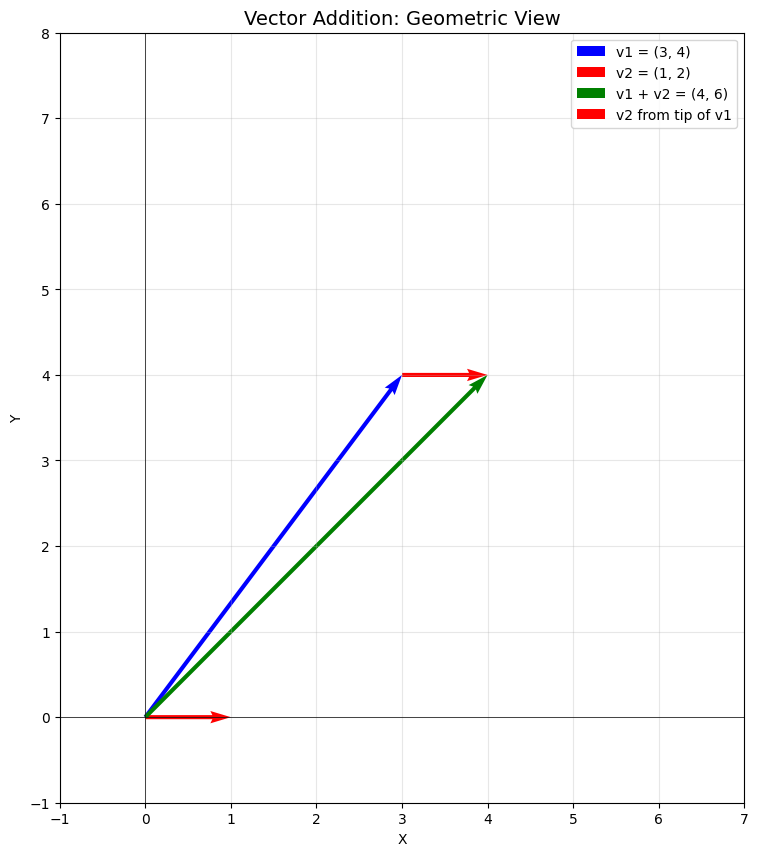

In [4]:
import matplotlib.pyplot as plt

def plot_vector(vector, origin=[0,0], color='blue', label=None):
    """Plot a 2D vector as an arrow"""
    plt.quiver(origin[0], origin[1],
        vector.components[0], vector.components[1],
        angles='xy', scale_units='xy', scale=1,
        color=color, width=0.006, label=label)
plt.figure(figsize=(10,10))
# Plot individual vectors
plot_vector(v1, color='blue', label='v1 = (3, 4)')
plot_vector(v2, color='red', label='v2 = (1, 2)')

# Plot sum
v_sum = v1 + v2
plot_vector(v_sum, color='green', label='v1 + v2 = (4, 6)')

# Show tip-to-tail addition
plot_vector(v2, origin=[3, 4], color='red', label='v2 from tip of v1')

# Configure plot
plt.xlim(-1, 7)
plt.ylim(-1, 8)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.legend()
plt.title("Vector Addition: Geometric View", fontsize=14)
plt.xlabel("X")
plt.ylabel("Y")
plt.gca().set_aspect('equal')
plt.show()